## Histogram Plotting and Otsu's Thresholding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

If we do the histogram calculation in usual way, for a 400,400 image, we need to iterate the whole thing for 400 x 400 x 256 time = 4,09,60,000 times just for a small image, that too in gray scale. If it is an RGB image, this should now be done 3 times. 
Another way is, we create an array of 256 elements and increment the respective position. This is demonstrated below and even the time is calculated

In [2]:
#Decorator to calculate the time to finish the function
def calculate_time(func):
    def inner_function(*args, **kwargs):
        begin = time.time()
        img_ = func(*args,**kwargs)
        end = time.time()
        print("Total Time taken = ",end-begin)
        return img_
    return inner_function

The function below only returns histogram for a Grayscale image

In [3]:
#Here is the HISTOGRAM FUNCTION
@calculate_time
def get_histogram(img):
    max_val = np.amax(img)
    k=1
    while k<max_val:
        k=k*2
    histogram = np.zeros(k)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            histogram[img[i][j]] = histogram[img[i][j]]+1
    return histogram
        

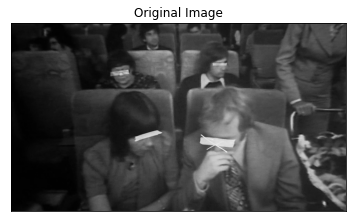

In [4]:
narcos_color = cv2.imread("narcos.jpg")
narcos = cv2.cvtColor(narcos_color,cv2.COLOR_BGR2GRAY)
plt.imshow(narcos,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Original Image")
plt.show()

In [5]:
histogram = get_histogram(narcos.copy())

Total Time taken =  0.4091379642486572


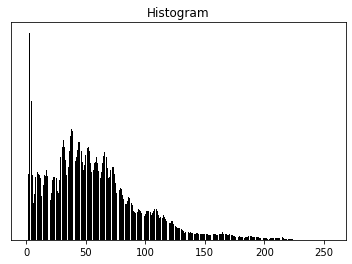

In [6]:
plt.bar(np.arange(len(histogram)),histogram,color='black')
plt.yticks([])
plt.title('Histogram')
plt.show()

If we want to plot a RGB histogram, then it would require us to disintegrate all the channels and plot histogram accordingly

Total Time taken =  0.4032113552093506
Total Time taken =  0.4098391532897949
Total Time taken =  0.39984631538391113


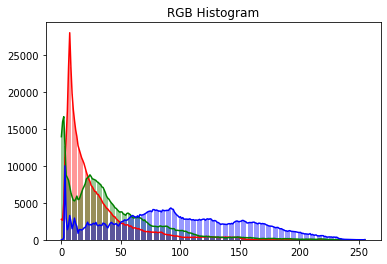

In [7]:

hist= {'red':get_histogram(narcos_color[:,:,0]),
           'green':get_histogram(narcos_color[:,:,1]),
           'blue':get_histogram(narcos_color[:,:,2])}
plt.bar(np.arange(256),hist['red'],alpha=0.4,color='red')
plt.plot(np.arange(256),hist['red'],color='red')
plt.bar(np.arange(256),hist['green'],alpha=0.4,color='green')
plt.plot(np.arange(256),hist['green'],color='green')
plt.bar(np.arange(256),hist['blue'],alpha=0.4,color='blue')
plt.plot(np.arange(256),hist['blue'],color='blue')
plt.title("RGB Histogram")
plt.show()
    

### Otsu's Thresholding
In Otsu's method, we take a value of intensity and calculate the weighted in-class variance of it by the formula given below
$$\sigma _{w}^{2} = W_{b} \sigma_{b}^{2} +W_{f} \sigma_{f}^{2}$$
where, <br>$W_{b,f}$ are the Normalized number of pixels in Background or Foreground and<br>$\sigma_{b,f}$ are Variance of Background or Foreground

In [8]:
@calculate_time
def otsu_threshold(hist,graph=False):
    sig=[]
    for mid in range(2,len(hist)):
        background = hist[:mid-1]
        foreground = hist[mid:]
        N = sum(hist)
        Wb = np.cumsum(background)[-1]/N
        Wf = np.cumsum(foreground)[-1]/N
        ub,uf,Nb,Nf=0,0,sum(background),sum(foreground)
        sigmaB,sigmaF = 0,0
        ub = sum(np.arange(len(background))*background)/ (Wb*N+1)
        #for m in range(len(background)):
         #   sigmaB = sigmaB + (m-ub)**2*background[m]/Nb
        sigmaB = sum((np.arange(len(background))-ub)**2*background)/Nb
        
        uf = sum(np.arange(len(foreground))*foreground)/ (Wf*N+1)
        #for n in range(len(foreground)):
        #    sigmaF = sigmaF + (n-uf)**2*foreground[n]/Nf
        sigmaF = sum((np.arange(len(foreground))-uf)**2*foreground)/Nf
        

        sig.append(Wb*sigmaB + Wf*sigmaF)
    if graph:
        plt.plot(np.arange(len(sig)),sig)
        plt.title("Weighted inter-class variance")
        plt.show()
    sig = np.nan_to_num(sig)
    return np.nonzero(sig==np.amin(sig[sig!=0]))[0]
        
    

In [9]:
def thresholder(img,t):
	for i in range(img.shape[0]):
		for j in range(img.shape[1]):
			if img[i][j] > t:
				img[i][j] = 255
			else:
				img[i][j] = 0

	return img

Total Time taken =  0.7715296745300293


/tmp/ipykernel_16962/4290517191.py:15: RuntimeWarning: invalid value encountered in double_scalars
  sigmaB = sum((np.arange(len(background))-ub)**2*background)/Nb
/tmp/ipykernel_16962/4290517191.py:20: RuntimeWarning: invalid value encountered in double_scalars
  sigmaF = sum((np.arange(len(foreground))-uf)**2*foreground)/Nf


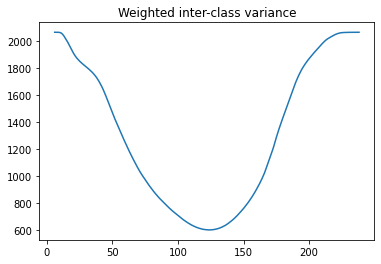

Total Time taken =  0.16473102569580078


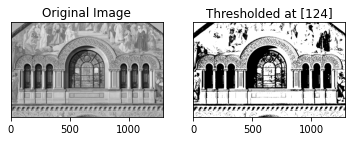

In [10]:
church = cv2.imread('church.png')
church = cv2.cvtColor(church,cv2.COLOR_BGR2GRAY)
otsu_thres = otsu_threshold(get_histogram(church.copy()),graph=True)
church_t = thresholder(church.copy(),otsu_thres)
plt.subplot(1,2,1)
plt.imshow(church,cmap='gray')
plt.title("Original Image")
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(church_t,cmap='gray')
plt.title("Thresholded at "+str(otsu_thres))
plt.yticks([])
plt.show()

Total Time taken =  1.3304030895233154
Total Time taken =  0.024809598922729492


/tmp/ipykernel_16962/4290517191.py:15: RuntimeWarning: invalid value encountered in double_scalars
  sigmaB = sum((np.arange(len(background))-ub)**2*background)/Nb
/tmp/ipykernel_16962/4290517191.py:20: RuntimeWarning: invalid value encountered in double_scalars
  sigmaF = sum((np.arange(len(foreground))-uf)**2*foreground)/Nf


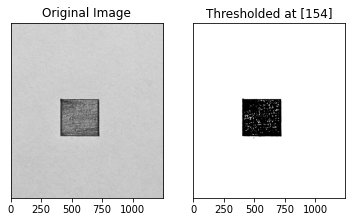

In [11]:
img = cv2.imread('measuring2/S6.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
otsu_thres = otsu_threshold(get_histogram(img.copy()))
img_t = thresholder(img.copy(),otsu_thres)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(img_t,cmap='gray')
plt.title("Thresholded at "+str(otsu_thres))
plt.yticks([])
plt.yticks([])
plt.show()

In the histogram below, we can see that the histogram is not quite spread, here is where we face drawbacks of Otsu's method, wherein it will to choose the point somewhere between the two similar large values, which makes the whole lot of many pixels to align one side when thresholded

Total Time taken =  1.3318357467651367


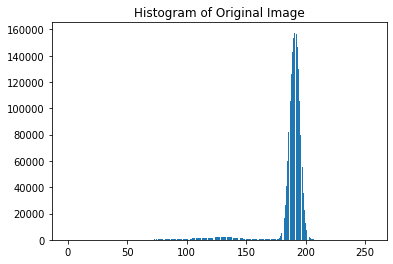

In [12]:
hist_og = get_histogram(img)
plt.bar(np.arange(len(hist_og)),hist_og)
plt.title("Histogram of Original Image")
plt.show()

### Given Homework on Ostu's and Histograms of their original image

Total Time taken =  0.05625581741333008
Total Time taken =  0.02489495277404785


/tmp/ipykernel_16962/4290517191.py:15: RuntimeWarning: invalid value encountered in double_scalars
  sigmaB = sum((np.arange(len(background))-ub)**2*background)/Nb
/tmp/ipykernel_16962/4290517191.py:20: RuntimeWarning: invalid value encountered in double_scalars
  sigmaF = sum((np.arange(len(foreground))-uf)**2*foreground)/Nf


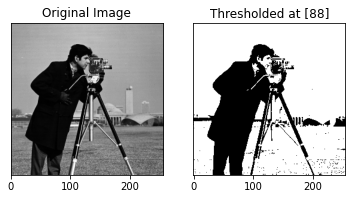

In [13]:
img = cv2.imread('cameraman.tif')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
otsu_thres = otsu_threshold(get_histogram(img.copy()))
img_t = thresholder(img.copy(),otsu_thres)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(img_t,cmap='gray')
plt.title("Thresholded at "+str(otsu_thres))
plt.yticks([])
plt.yticks([])
plt.show()

Total Time taken =  0.05809473991394043


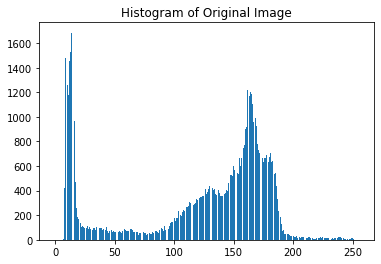

In [14]:
hist_og = get_histogram(img)
plt.bar(np.arange(len(hist_og)),hist_og)
plt.title("Histogram of Original Image")
plt.show()

Total Time taken =  0.05207538604736328
Total Time taken =  0.02456831932067871


/tmp/ipykernel_16962/4290517191.py:15: RuntimeWarning: invalid value encountered in double_scalars
  sigmaB = sum((np.arange(len(background))-ub)**2*background)/Nb
/tmp/ipykernel_16962/4290517191.py:20: RuntimeWarning: invalid value encountered in double_scalars
  sigmaF = sum((np.arange(len(foreground))-uf)**2*foreground)/Nf


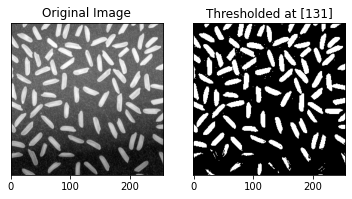

In [15]:
img = cv2.imread('rice.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
otsu_thres = otsu_threshold(get_histogram(img.copy()))
img_t = thresholder(img.copy(),otsu_thres)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(img_t,cmap='gray')
plt.title("Thresholded at "+str(otsu_thres))
plt.yticks([])
plt.yticks([])
plt.show()

Total Time taken =  0.05450582504272461


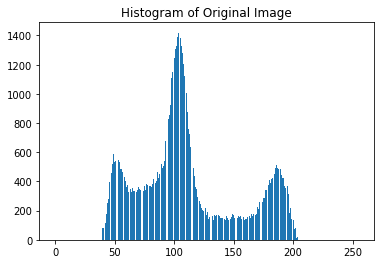

In [16]:
hist_og = get_histogram(img)
plt.bar(np.arange(len(hist_og)),hist_og)
plt.title("Histogram of Original Image")
plt.show()

Total Time taken =  0.057993412017822266
Total Time taken =  0.024788618087768555


/tmp/ipykernel_16962/4290517191.py:15: RuntimeWarning: invalid value encountered in double_scalars
  sigmaB = sum((np.arange(len(background))-ub)**2*background)/Nb


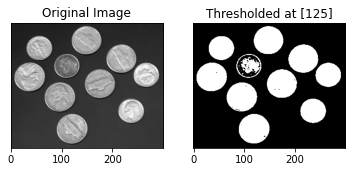

In [17]:
img = cv2.imread('coins.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
otsu_thres = otsu_threshold(get_histogram(img.copy()))
img_t = thresholder(img.copy(),otsu_thres)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(img_t,cmap='gray')
plt.title("Thresholded at "+str(otsu_thres))
plt.yticks([])
plt.yticks([])
plt.show()

Total Time taken =  0.06131792068481445


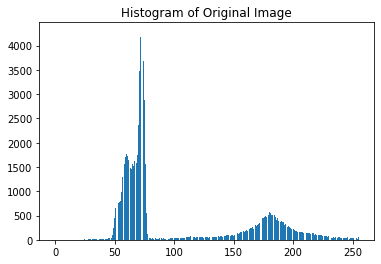

In [18]:
hist_og = get_histogram(img)
plt.bar(np.arange(len(hist_og)),hist_og)
plt.title("Histogram of Original Image")
plt.show()

Total Time taken =  0.05892229080200195
Total Time taken =  0.025318384170532227


/tmp/ipykernel_16962/4290517191.py:15: RuntimeWarning: invalid value encountered in double_scalars
  sigmaB = sum((np.arange(len(background))-ub)**2*background)/Nb
/tmp/ipykernel_16962/4290517191.py:20: RuntimeWarning: invalid value encountered in double_scalars
  sigmaF = sum((np.arange(len(foreground))-uf)**2*foreground)/Nf


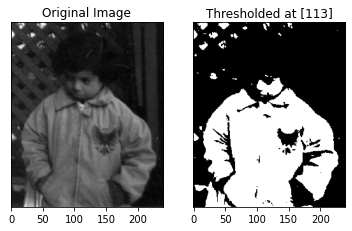

In [19]:
img = cv2.imread('pout.tif')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
otsu_thres = otsu_threshold(get_histogram(img.copy()))
img_t = thresholder(img.copy(),otsu_thres)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(img_t,cmap='gray')
plt.title("Thresholded at "+str(otsu_thres))
plt.yticks([])
plt.yticks([])
plt.show()

Total Time taken =  0.0576326847076416


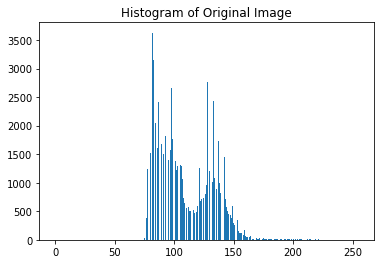

In [20]:
hist_og = get_histogram(img)
plt.bar(np.arange(len(hist_og)),hist_og)
plt.title("Histogram of Original Image")
plt.show()

We can conclude that even though Otsu's is a popularly used algorithm, it works best on images with more contrast, else, some preprocessing must be done to precompensate the alogrithms drawbacks